# Solving a simple maze puzzle with Q-Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The game

In [2]:
# loading the maze
import maze
M = maze.maze_7x5()

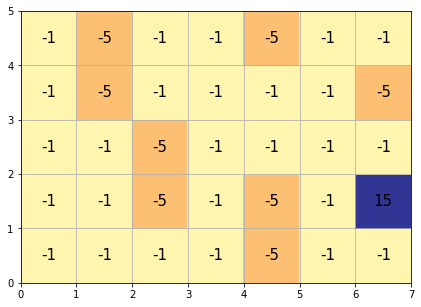

In [3]:
vmax = np.abs(M).max()
vmin = -vmax
fig = plt.figure(figsize=(7,5))
plt.pcolor(M.T, cmap=plt.cm.RdYlBu, vmin=vmin, vmax=vmax)
plt.grid()
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        s = str(int(M[i,j])).zfill(2)
        plt.text(i+0.5, j+0.5, s, horizontalalignment='center',
                                verticalalignment='center', size=15)

### Game rules

1. Game starts at a random position on the board
2. The goal is to reach the blue position with maximum possible accumulated points
3. The player can move *UP*, *DOWN*, *LEFT*, or *RIGHT*; moves off the board are not allowed
4. In each new position, the player receives a penalty (-1 or -5) or a reward (+15), as indicating in the plot above


## Q-learning model

In [4]:
from qlearn_maze_agent import QLearnAgent

In [5]:
maze_matrix = maze.maze_7x5()

In [6]:
r_goal = maze_matrix.max()

In [7]:
action_array = np.array([-1, 1, 10, -10], dtype=int) # left, right, up, down

In [8]:
agent = QLearnAgent(maze_matrix, action_array, r_goal)

In [9]:
agent.train(nmax_episodes=500, alpha=0.2, gamma=0.7)

i: 000, s: 00, a: 01, r:  -1.0, i_s: 000
i: 001, s: 01, a: 01, r:  -1.0, i_s: 005
i: 002, s: 02, a: 01, r:  -1.0, i_s: 010
i: 003, s: 03, a: 10, r:  -1.0, i_s: 015
i: 004, s: 13, a: 10, r:  -1.0, i_s: 016
i: 005, s: 23, a: 01, r:  -1.0, i_s: 017
i: 006, s: 24, a: 01, r:  -1.0, i_s: 022
i: 007, s: 25, a: 01, r:  -1.0, i_s: 027
i: 008, s: 26, a: -10, r:  -1.0, i_s: 032
i: 009, s: 16, a: -1, r:  15.0, i_s: 031

  Total points: 6.0



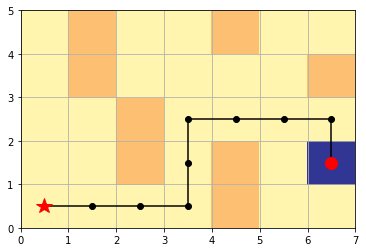

In [10]:
agent.plot(0, verbose=1)

## The Q-table

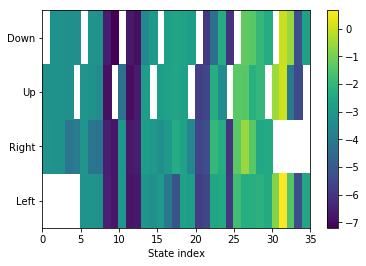

In [11]:
# Masked values are forbiden states
plt.clf()
plt.pcolor(agent.Q.T)
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Left', 'Right', 'Up', 'Down'])
plt.xlabel('State index')
plt.colorbar()

## Training error (sort of)

In [ ]:
plt.loglog(np.arange(agent.n_episodes)+1, agent.err_q, '-o')
plt.xlabel('# of training episodes')
plt.ylabel('Changing ration w.r.t. the first episode')

Text(0,0.5,'Changing ration w.r.t. the first episode')

## Animating results with ImageMagik

In [12]:
agent.multi_plot(slist=[0, 42, 46, 22], basename='fig')

fig_episode1_step001.png
fig_episode1_step002.png
fig_episode1_step003.png
fig_episode1_step004.png
fig_episode1_step005.png
fig_episode1_step006.png
fig_episode1_step007.png
fig_episode1_step008.png
fig_episode1_step009.png
fig_episode1_step010.png
fig_episode2_step001.png
fig_episode2_step002.png
fig_episode2_step003.png
fig_episode2_step004.png
fig_episode2_step005.png
fig_episode2_step006.png
fig_episode2_step007.png
fig_episode2_step008.png
fig_episode3_step001.png
fig_episode3_step002.png
fig_episode3_step003.png
fig_episode3_step004.png
fig_episode3_step005.png
fig_episode3_step006.png
fig_episode4_step001.png
fig_episode4_step002.png
fig_episode4_step003.png
fig_episode4_step004.png
fig_episode4_step005.png
fig_episode4_step006.png


### Making an animated gif with `convert`
```
convert -delay 16 -loop 0 fig_episode*_step*.png play_game.gif
```

#![Ta-dam](play_game.gif)